In [20]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from train import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


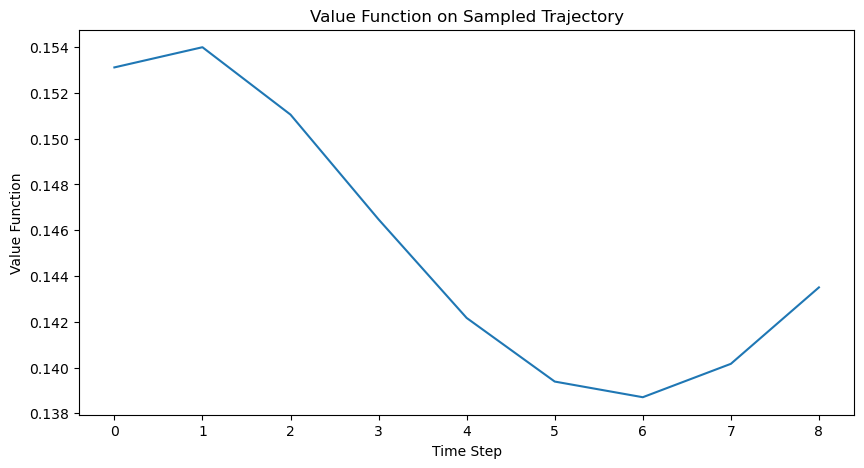

Step 0: Average evaluation return = 0.00
Step 972: Average episodic return = 20.53
Step 972: Critic loss = 0.3694
Step 972: Actor loss = -0.1958
Step 1944: Average episodic return = 27.12
Step 1944: Critic loss = 0.8116
Step 1944: Actor loss = 0.0821
Step 2916: Average episodic return = 22.12
Step 2916: Critic loss = 0.7244
Step 2916: Actor loss = 0.3171
Step 3888: Average episodic return = 25.99
Step 3888: Critic loss = 0.4015
Step 3888: Actor loss = 0.0252
Step 4860: Average episodic return = 25.41
Step 4860: Critic loss = 1.5821
Step 4860: Actor loss = -0.1748
Step 5832: Average episodic return = 23.00
Step 5832: Critic loss = 0.7230
Step 5832: Actor loss = -0.3030
Step 6804: Average episodic return = 22.89
Step 6804: Critic loss = 0.3909
Step 6804: Actor loss = -0.2732
Step 7776: Average episodic return = 23.03
Step 7776: Critic loss = 0.5242
Step 7776: Actor loss = -0.1714
Step 8748: Average episodic return = 26.53
Step 8748: Critic loss = 0.4346
Step 8748: Actor loss = -0.3513
St

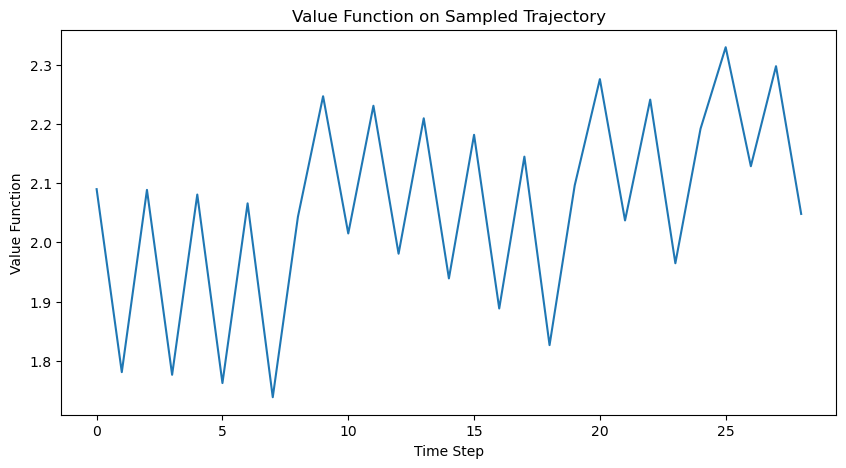

Step 9972: Average evaluation return = 0.00
Step 10692: Average episodic return = 26.19
Step 10692: Critic loss = 0.2654
Step 10692: Actor loss = -0.1257
Step 11664: Average episodic return = 26.29
Step 11664: Critic loss = 0.8756
Step 11664: Actor loss = 0.2021
Step 12636: Average episodic return = 32.03
Step 12636: Critic loss = 0.9065
Step 12636: Actor loss = 0.0861
Step 13608: Average episodic return = 22.79
Step 13608: Critic loss = 0.5233
Step 13608: Actor loss = 0.0862
Step 14580: Average episodic return = 24.98
Step 14580: Critic loss = 0.5317
Step 14580: Actor loss = -0.3140
Step 15552: Average episodic return = 26.65
Step 15552: Critic loss = 0.4072
Step 15552: Actor loss = -0.1691
Step 16524: Average episodic return = 25.65
Step 16524: Critic loss = 0.7191
Step 16524: Actor loss = 0.2027
Step 17496: Average episodic return = 32.56
Step 17496: Critic loss = 0.3037
Step 17496: Actor loss = -0.2900
Step 18468: Average episodic return = 26.35
Step 18468: Critic loss = 0.5464
Ste

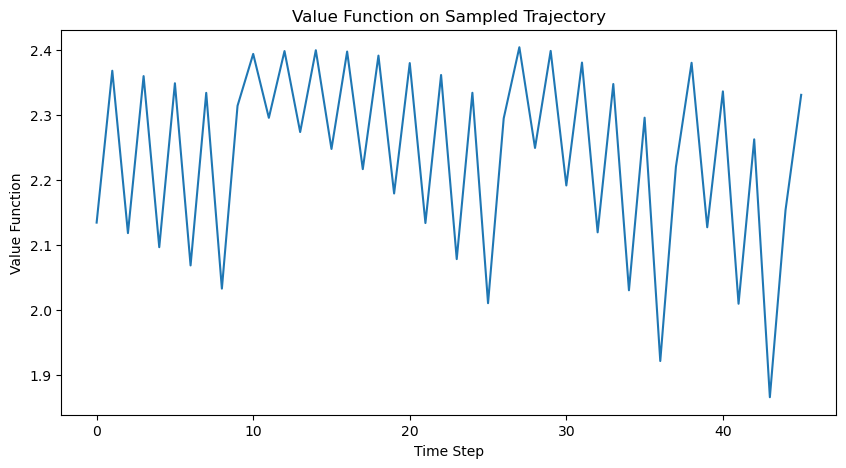

Step 19944: Average evaluation return = 0.00
Step 20412: Average episodic return = 31.16
Step 20412: Critic loss = 0.4964
Step 20412: Actor loss = -0.4263
Step 21384: Average episodic return = 31.63
Step 21384: Critic loss = 0.3531
Step 21384: Actor loss = -0.0374
Step 22356: Average episodic return = 23.83
Step 22356: Critic loss = 0.4787
Step 22356: Actor loss = -0.1610
Step 23328: Average episodic return = 31.31
Step 23328: Critic loss = 0.5633
Step 23328: Actor loss = -0.2888
Step 24300: Average episodic return = 25.47
Step 24300: Critic loss = 0.5799
Step 24300: Actor loss = -0.0884
Step 25272: Average episodic return = 31.34
Step 25272: Critic loss = 0.7117
Step 25272: Actor loss = -0.2452
Step 26244: Average episodic return = 32.96
Step 26244: Critic loss = 0.2375
Step 26244: Actor loss = 0.0535
Step 27216: Average episodic return = 30.89
Step 27216: Critic loss = 0.6881
Step 27216: Actor loss = 0.2099
Step 28188: Average episodic return = 32.26
Step 28188: Critic loss = 0.3679


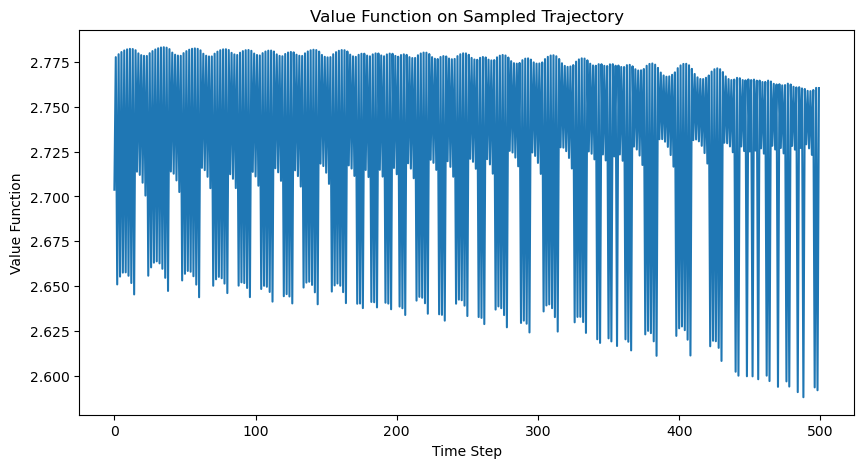

Step 29916: Average evaluation return = 0.00
Step 30132: Average episodic return = 31.96
Step 30132: Critic loss = 0.2631
Step 30132: Actor loss = -0.0745
Step 31104: Average episodic return = 35.04
Step 31104: Critic loss = 1.7685
Step 31104: Actor loss = 0.0001
Step 32076: Average episodic return = 30.73
Step 32076: Critic loss = 1.3892
Step 32076: Actor loss = 0.2473
Step 33048: Average episodic return = 37.96
Step 33048: Critic loss = 0.2622
Step 33048: Actor loss = -0.1971
Step 34020: Average episodic return = 29.73
Step 34020: Critic loss = 0.4818
Step 34020: Actor loss = -0.1897
Step 34992: Average episodic return = 37.89
Step 34992: Critic loss = 0.2899
Step 34992: Actor loss = -0.0014
Step 35964: Average episodic return = 59.85
Step 35964: Critic loss = 0.7567
Step 35964: Actor loss = 0.0425
Step 36936: Average episodic return = 35.15
Step 36936: Critic loss = 0.6798
Step 36936: Actor loss = 0.1713
Step 37908: Average episodic return = 30.44
Step 37908: Critic loss = 0.3832
St

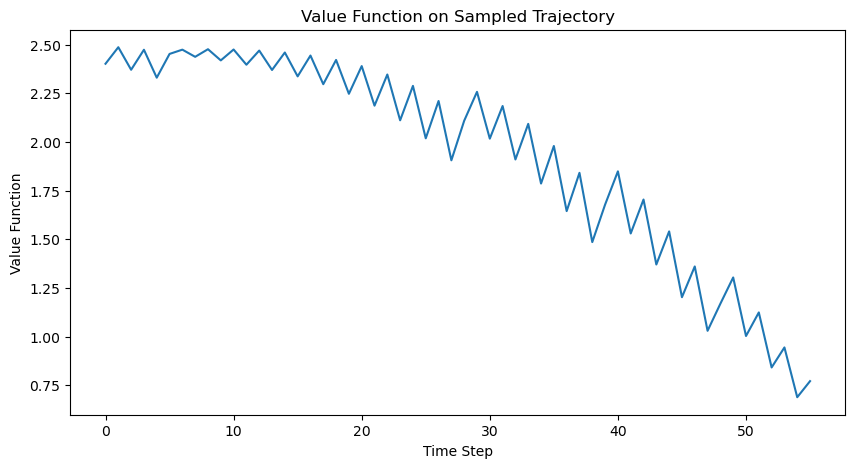

Step 39888: Average evaluation return = 0.00
Step 40824: Average episodic return = 37.67
Step 40824: Critic loss = 0.3007
Step 40824: Actor loss = -0.0768
Step 41796: Average episodic return = 30.89
Step 41796: Critic loss = 0.3326
Step 41796: Actor loss = 0.0762
Step 42768: Average episodic return = 34.59
Step 42768: Critic loss = 0.4541
Step 42768: Actor loss = 0.1702
Step 43740: Average episodic return = 46.08
Step 43740: Critic loss = 0.3885
Step 43740: Actor loss = -0.0688
Step 44712: Average episodic return = 37.84
Step 44712: Critic loss = 0.1618
Step 44712: Actor loss = -0.1450
Step 45684: Average episodic return = 38.03
Step 45684: Critic loss = 0.1539
Step 45684: Actor loss = 0.0065
Step 46656: Average episodic return = 35.66
Step 46656: Critic loss = 0.6549
Step 46656: Actor loss = 0.0985
Step 47628: Average episodic return = 47.28
Step 47628: Critic loss = 0.2099
Step 47628: Actor loss = -0.1029
Step 48600: Average episodic return = 38.41
Step 48600: Critic loss = 0.2831
St

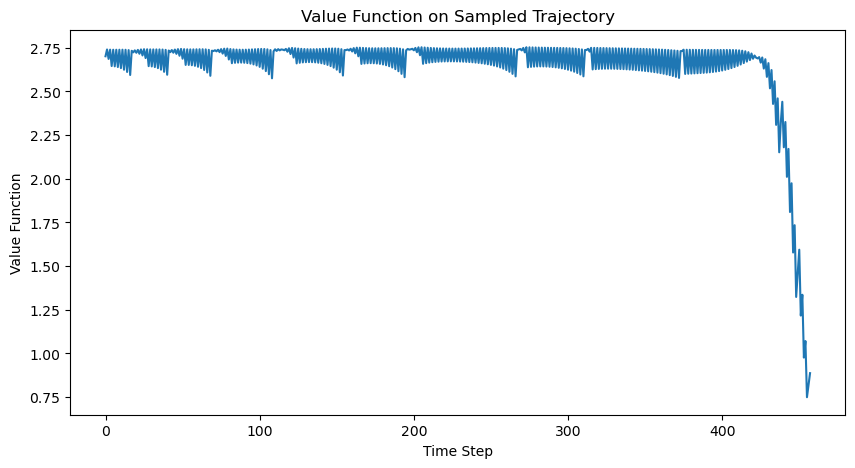

Step 49860: Average evaluation return = 0.00
Step 50544: Average episodic return = 46.36
Step 50544: Critic loss = 0.4118
Step 50544: Actor loss = -0.1430
Step 51516: Average episodic return = 39.13
Step 51516: Critic loss = 0.9410
Step 51516: Actor loss = -0.0684
Step 52488: Average episodic return = 46.96
Step 52488: Critic loss = 0.3272
Step 52488: Actor loss = 0.1803
Step 53460: Average episodic return = 45.58
Step 53460: Critic loss = 0.6688
Step 53460: Actor loss = 0.2453
Step 54432: Average episodic return = 38.72
Step 54432: Critic loss = 1.6362
Step 54432: Actor loss = -0.7526
Step 55404: Average episodic return = 38.82
Step 55404: Critic loss = 0.4490
Step 55404: Actor loss = 0.0691
Step 56376: Average episodic return = 40.26
Step 56376: Critic loss = 0.4783
Step 56376: Actor loss = 0.0253
Step 57348: Average episodic return = 43.04
Step 57348: Critic loss = 0.3652
Step 57348: Actor loss = -0.0021
Step 58320: Average episodic return = 33.58
Step 58320: Critic loss = 0.3283
St

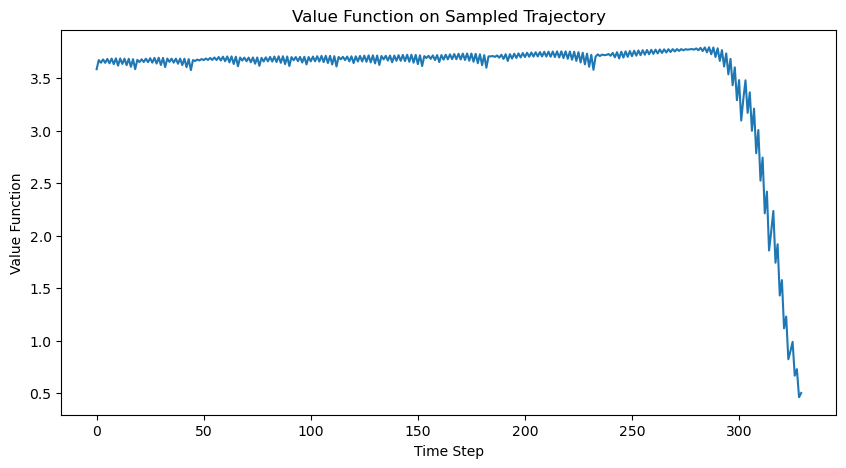

Step 59832: Average evaluation return = 0.00
Step 60264: Average episodic return = 37.98
Step 60264: Critic loss = 0.2559
Step 60264: Actor loss = -0.2230
Step 61236: Average episodic return = 39.07
Step 61236: Critic loss = 0.6073
Step 61236: Actor loss = -0.2153
Step 62208: Average episodic return = 45.36
Step 62208: Critic loss = 0.9193
Step 62208: Actor loss = 0.3089
Step 63180: Average episodic return = 42.36
Step 63180: Critic loss = 0.1891
Step 63180: Actor loss = -0.1740
Step 64152: Average episodic return = 36.03
Step 64152: Critic loss = 0.5403
Step 64152: Actor loss = -0.4267
Step 65124: Average episodic return = 42.19
Step 65124: Critic loss = 1.3222
Step 65124: Actor loss = 0.3095
Step 66096: Average episodic return = 47.40
Step 66096: Critic loss = 0.4612
Step 66096: Actor loss = -0.1873
Step 67068: Average episodic return = 58.31
Step 67068: Critic loss = 0.1839
Step 67068: Actor loss = -0.0513
Step 68040: Average episodic return = 50.21
Step 68040: Critic loss = 0.7565


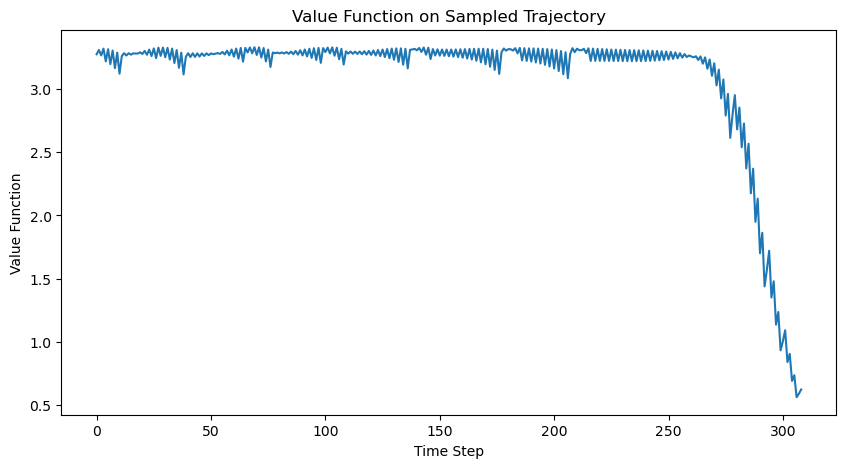

Step 69804: Average evaluation return = 0.00
Step 69984: Average episodic return = 43.42
Step 69984: Critic loss = 0.3761
Step 69984: Actor loss = 0.1200
Step 70956: Average episodic return = 58.85
Step 70956: Critic loss = 0.3098
Step 70956: Actor loss = -0.1883
Step 71928: Average episodic return = 53.26
Step 71928: Critic loss = 0.2175
Step 71928: Actor loss = 0.0711
Step 72900: Average episodic return = 52.63
Step 72900: Critic loss = 0.5858
Step 72900: Actor loss = 0.0264
Step 73872: Average episodic return = 49.29
Step 73872: Critic loss = 0.4351
Step 73872: Actor loss = -0.4603
Step 74844: Average episodic return = 35.88
Step 74844: Critic loss = 0.2043
Step 74844: Actor loss = 0.0271
Step 75816: Average episodic return = 48.72
Step 75816: Critic loss = 0.3649
Step 75816: Actor loss = -0.1454
Step 76788: Average episodic return = 38.31
Step 76788: Critic loss = 0.2728
Step 76788: Actor loss = -0.1500
Step 77760: Average episodic return = 50.04
Step 77760: Critic loss = 0.2880
St

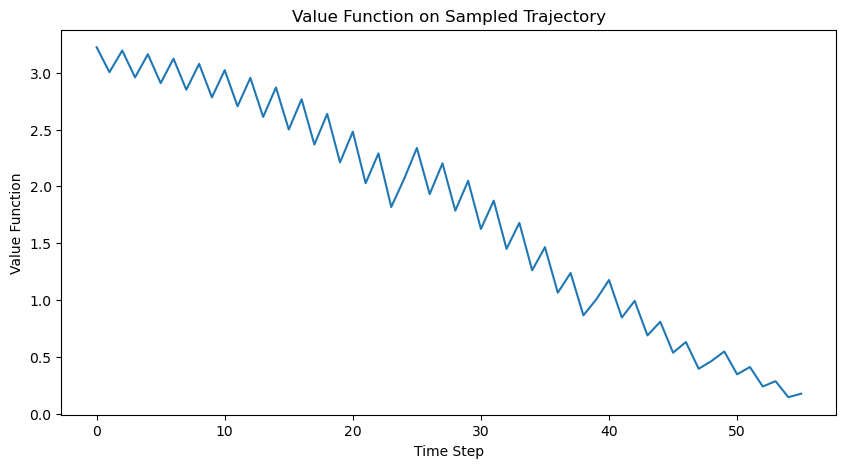

Step 79776: Average evaluation return = 0.00
Step 80676: Average episodic return = 47.75
Step 80676: Critic loss = 0.7857
Step 80676: Actor loss = 0.2483
Step 81648: Average episodic return = 50.23
Step 81648: Critic loss = 0.6326
Step 81648: Actor loss = 0.1715
Step 82620: Average episodic return = 83.06
Step 82620: Critic loss = 0.8721
Step 82620: Actor loss = 0.0051
Step 83592: Average episodic return = 51.26
Step 83592: Critic loss = 1.2344
Step 83592: Actor loss = 0.4390
Step 84564: Average episodic return = 54.84
Step 84564: Critic loss = 0.3906
Step 84564: Actor loss = -0.2624
Step 85536: Average episodic return = 45.21
Step 85536: Critic loss = 0.2077
Step 85536: Actor loss = -0.0813
Step 86508: Average episodic return = 53.86
Step 86508: Critic loss = 0.1617
Step 86508: Actor loss = -0.1896
Step 87480: Average episodic return = 51.76
Step 87480: Critic loss = 0.4197
Step 87480: Actor loss = -0.0310
Step 88452: Average episodic return = 50.48
Step 88452: Critic loss = 0.3275
St

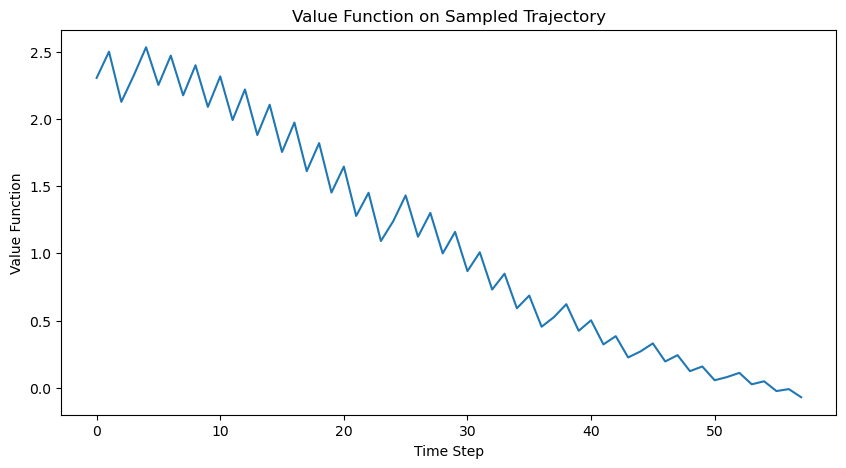

Step 89748: Average evaluation return = 0.00
Step 90396: Average episodic return = 59.57
Step 90396: Critic loss = 0.3714
Step 90396: Actor loss = 0.1321
Step 91368: Average episodic return = 62.10
Step 91368: Critic loss = 0.2253
Step 91368: Actor loss = -0.1309
Step 92340: Average episodic return = 58.11
Step 92340: Critic loss = 0.2154
Step 92340: Actor loss = -0.1585


KeyboardInterrupt: 

In [21]:
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=10000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [ ]:
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [ ]:
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [ ]:
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [ ]:
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [ ]:
lr_actor=3e-4
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask)

In [6]:
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")
env.reset()
img = plt.imshow(env.render('rgb_array'))
img

TypeError: Wrapper.render() takes 1 positional argument but 2 were given